## Observations and Insights 

In [325]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')
 
# Display the data table for preview


In [326]:
# Checking the number of mice.
num_mice = len(df['Mouse ID'].unique())
num_mice

249

In [327]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = df.duplicated(subset=['Mouse ID', 'Timepoint'], keep='first')
dup_mouse

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [328]:
df['Is Duplicate'] = dup_mouse
df_dup_mouse_data = df[df['Is Duplicate']== True]
dup_mouse_id = df['Mouse ID'].unique()[0]
dup_mouse_id

'b128'

In [329]:
# Optional: Get all the data for the duplicate mouse ID. 
df_dup_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Is Duplicate
137,g989,0,45.000000,0,Propriva,Female,21,26,True
360,g989,5,47.570392,0,Propriva,Female,21,26,True
681,g989,10,49.880528,0,Propriva,Female,21,26,True
869,g989,15,53.442020,0,Propriva,Female,21,26,True
1111,g989,20,54.657650,1,Propriva,Female,21,26,True


In [330]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep="first", inplace=False)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Is Duplicate
0,b128,0,45.000000,0,Capomulin,Female,9,22,False
1,f932,0,45.000000,0,Ketapril,Male,15,29,False
2,g107,0,45.000000,0,Ketapril,Female,2,29,False
3,a457,0,45.000000,0,Ketapril,Female,11,30,False
4,c819,0,45.000000,0,Ketapril,Male,21,25,False
...,...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25,False
1889,u364,45,31.023923,3,Capomulin,Male,18,17,False
1890,p438,45,61.433892,1,Ceftamin,Female,11,26,False
1891,x773,45,58.634971,4,Placebo,Female,21,30,False


In [331]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

249

## Summary Statistics

In [332]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_grp = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen'])

In [333]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#grouped tumor volume by drug regimen 
tumor_grp = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen'])

In [334]:
#turn drug regimen to list so I can add to summery table
drug_reg = clean_df['Drug Regimen'].unique()
drug_reg.sort()

In [335]:
# Assemble the resulting series into a single summary dataframe.
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#dictionary for summary table
stats = {'Drug Regimen': list(drug_reg),
        'Mean': list(tumor_grp.mean()),
        'Median': list(tumor_grp.median()),
        'Variance': list(tumor_grp.var()),
        'Standard Deviation': list(tumor_grp.std()),
        'SEM': list(tumor_grp.sem())}
#summary data table
stats_df = pd.DataFrame(stats)
stats_df

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [336]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#stats_df.aggregate(func=None, axis=0, *'Drug Regimen', **'Tumor Volume (mm3)')
#stats_df.agg(mean=pd.NamedAgg(column='Mean', aggfunc='max'),) 

## Bar and Pie Charts

In [337]:
#create new df - get only Mouse ID and Drug Regimen, sex cols
df_m_reg = clean_df[["Mouse ID", "Drug Regimen", "Sex"]]
# now we have 1888 records bercause clean was merged with study results
df_m_reg = df_m_reg.drop_duplicates(subset=["Mouse ID", "Drug Regimen"], keep="first", inplace=False)
#new df for disticnt mice by gender
df_m_gen = df_m_reg
#now we have distinct rows 1 to 1 relationship Mouse ID => Drug Regimen 
#df_m_reg.reset_index(inplace=True)
g_df_m_reg = df_m_reg.groupby('Drug Regimen', as_index=False)
df_m_reg = g_df_m_reg.count() 
#df_m_reg.set_index('index', inplace = True)
df_m_reg

,Drug Regimen,Mouse ID,Sex
0,Capomulin,25,25
1,Ceftamin,25,25
2,Infubinol,25,25
3,Ketapril,25,25
4,Naftisol,25,25
5,Placebo,25,25
6,Propriva,25,25
7,Ramicane,25,25
8,Stelasyn,24,24
9,Zoniferol,25,25


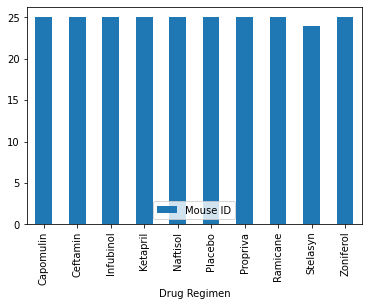

In [338]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
df_m_reg.plot(kind='bar', x='Drug Regimen', y='Mouse ID')

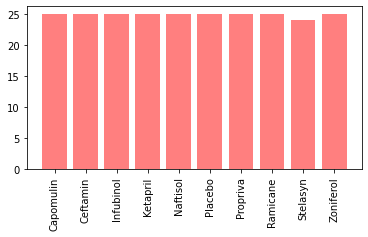

In [339]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = range(len(df_m_reg['Mouse ID']))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(6,3))
plt.bar(x_axis, df_m_reg['Mouse ID'], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, df_m_reg['Drug Regimen'], rotation="vertical")
plt.show()

In [340]:
male_count = df_m_gen['Sex'].value_counts()['Male']
female_count = df_m_gen['Sex'].value_counts()['Female']
gender_count = [male_count, female_count]
gen_series = pd.Series(gender_count)

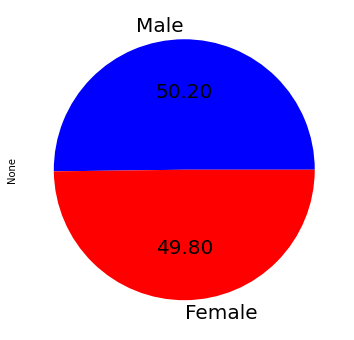

In [341]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gen_series.plot.pie(labels=['Male','Female'], colors=['b', 'r'], autopct='%.2f', fontsize=20, figsize=(6,6))


(-1.1826161361844658,
 1.259414224470649,
 -1.1980096057711194,
 1.2867143668959178)

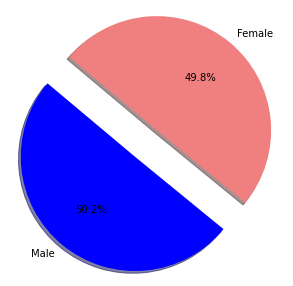

In [342]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [male_count, female_count]

# The colors of each section of the pie chart
colors = ["blue", "lightcoral"]

# Tells matplotlib to seperate the "male" section from the others
explode = (0.1, 0.2)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(5,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [343]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_df = clean_df.groupby('Mouse ID').max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_mt_df = pd.merge(mouse_df, clean_df, on=['Mouse ID', 'Timepoint'], how='inner', suffixes=['','_y'])
merged_mt_df.to_csv("data/merged.csv", index=False, header=True)


In [ ]:
#removing unneeded columns
tumor_vol_df = merged_mt_df.iloc[:,[0,1,2,3,4,5]]
tumor_vol_df

In [346]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

In [347]:
# Locate the rows which contain mice on each drug and get the tumor volumes
treatment_filter1 = tumor_vol_df["Drug Regimen"].isin(treatments) 
vol_by_reg_df = tumor_vol_df[treatment_filter1]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
vol_by_reg_df.groupby('Drug Regimen').describe()
new_df = vol_by_reg_df['Tumor Volume (mm3)'].groupby(vol_by_reg_df["Drug Regimen"])
tumor_stats_df = new_df.describe()
 # add subset    

In [348]:
# Determine outliers using upper and lower bounds
#tumor vol stats by regimen
tumor_stats_df['IQR'] = tumor_stats_df['75%'] - tumor_stats_df['25%']
#add lower and upper boundry
tumor_stats_df['Lower Boundry'] = tumor_stats_df['25%'] - (1.5 * tumor_stats_df['25%'])
tumor_stats_df['Upper Boundry'] = tumor_stats_df['75%'] + (1.5 * tumor_stats_df['25%'])
tumor_stats_df

,count,mean,std,min,25%,50%,75%,max,IQR,Lower Boundry,Upper Boundry
Drug Regimen,,,,,,,,,,,
Capomulin,25.0,46.119199,1.009485,45.0,45.000000,45.893720,46.749006,48.158209,1.749006,-22.500000,114.249006
Ceftamin,25.0,57.753977,8.365568,45.0,48.722078,59.851956,64.299830,68.923185,15.577752,-24.361039,137.382947
Infubinol,25.0,58.525392,7.824082,45.0,54.048608,60.165180,65.525743,72.226731,11.477135,-27.024304,146.598654
Ramicane,25.0,45.678645,0.766220,45.0,45.000000,45.521875,46.343832,47.622816,1.343832,-22.500000,113.843832


In [349]:
#plot data
vol_by_reg_df
capomulin = vol_by_reg_df.loc[vol_by_reg_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ceftamin = vol_by_reg_df.loc[vol_by_reg_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
infubinol = vol_by_reg_df.loc[vol_by_reg_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ramicane = vol_by_reg_df.loc[vol_by_reg_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
#ceftamin

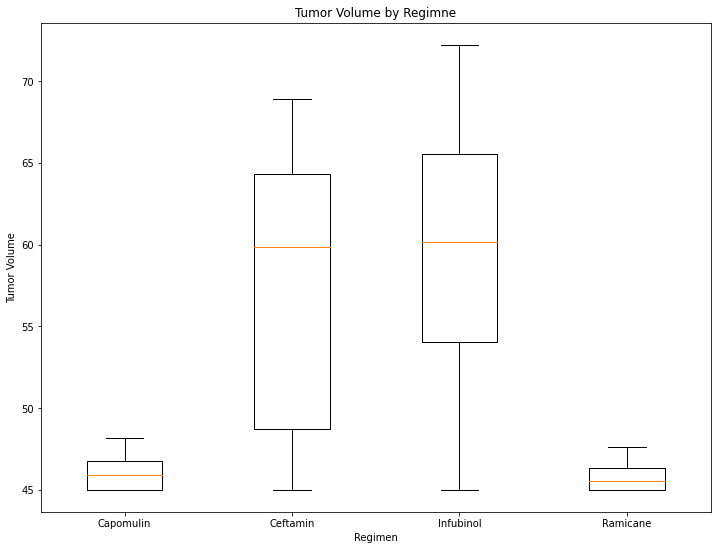

In [350]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#create box plot and format results
outliers = [55,56,57,58,59,70]
green_diamond = dict(markerfacecolor='g', marker='D')
figs = plt.figure(figsize = (12,9))
plt.boxplot(( capomulin, ceftamin, infubinol, ramicane), flierprops=green_diamond)
plt.title('Tumor Volume by Regimne')
plt.xlabel('Regimen')
plt.xticks([1,2,3, 4],treatments)
plt.ylabel('Tumor Volume')
plt.show()

In [319]:
#capomulin

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
